In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

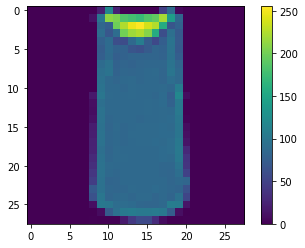

In [ ]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

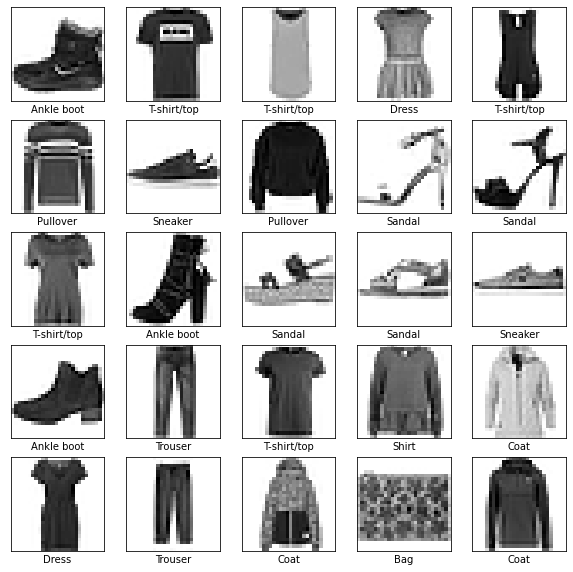

In [ ]:
# Looking at training data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

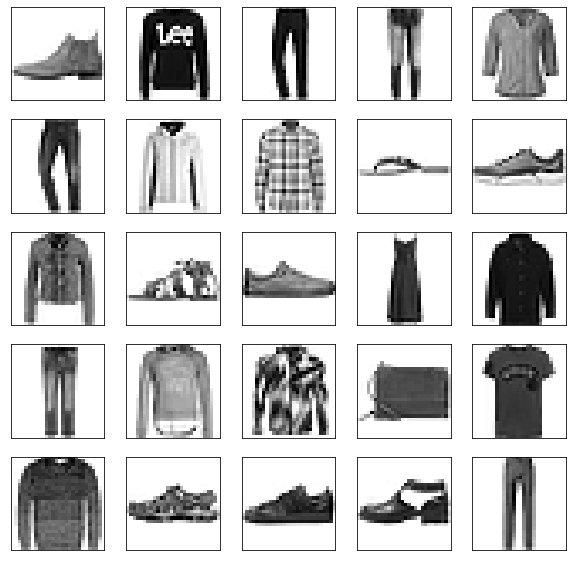

In [ ]:
#Let's look at testing data as well

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# Designing the neural network

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format
of the images from a two-dimensional array (of 28 by 28 pixels) to a 
one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as 
unstacking rows of pixels in the image and lining them up. This layer has no 
parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two 
tf.keras.layers.Dense layers. These are densely connected, or fully connected, 
neural layers. The first Dense layer has 128 nodes (or neurons). The second 
(and last) layer returns a logits array with length of 10. Each node contains a 
score that indicates the current image belongs to one of the 10 classes.

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

1. Loss function —This measures how accurate the model is during training. 
You want to minimize this function to "steer" the model in the right direction.
2. Optimizer —This is how the model is updated based on the data it sees and its loss function.
3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6207 - accuracy: 0.7840
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3838 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3452 - accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2908 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2480 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [ ]:
# Evaluating Accuracy against Testing data

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ",test_acc)


313/313 - 0s - loss: 0.3476 - accuracy: 0.8810
Test accuracy:  0.8809999823570251


In [ ]:
# Make predictions

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([5.4959542e-10, 3.3454760e-11, 1.4558338e-09, 2.9707661e-10,
       1.2856831e-09, 1.5358521e-04, 3.7826546e-09, 1.5999671e-03,
       6.7347123e-09, 9.9824643e-01], dtype=float32)

This array of 10 numbers stores the different probabilities of the 10 classes based on the input image from the test data.

In [ ]:
# Let's see what the maximum probability is in this array

np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

So, the maximum probability is of the image belonging to class 9, which was an ankle boot. Notice that the actual label of that image is also 9 which means the model predicted the class correctly!

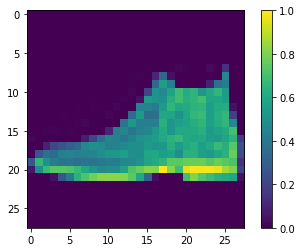

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()